# Pulsar Emission Data Analysis

In [61]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats

#### Section for extracting from a tar file. ####

##### Currently implemented for original TAR File structure.

In [62]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [63]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar6 = pd.read_csv("Data/J1644-4559.pulses", sep = ' ', header = None, names = colnames)

In [64]:
pulsar6.shape

(698, 3)

In [65]:
pulsar6.head(25)

,Pulse Number,Brightness,Uncertainty
0,1,0.634671,0.002761
1,2,0.736945,0.005207
2,3,0.693834,0.002706
3,4,1.021866,0.010184
4,5,0.673845,0.006236
5,6,0.676883,0.004763
6,7,0.527039,0.002422
7,8,0.673417,0.003174
8,9,0.357076,0.002848
9,10,0.661704,0.005588


In [66]:
pulsar6.describe()

,Pulse Number,Brightness,Uncertainty
count,698.00000,698.000000,698.000000
mean,349.50000,0.654319,0.004445
std,201.63953,0.163945,0.001855
min,1.00000,0.007642,0.002129
25%,175.25000,0.555267,0.003086
50%,349.50000,0.658295,0.003951
75%,523.75000,0.753396,0.005349
max,698.00000,1.159334,0.016097


In [67]:
pulsar6["Brightness"].describe()

count    698.000000
mean       0.654319
std        0.163945
min        0.007642
25%        0.555267
50%        0.658295
75%        0.753396
max        1.159334
Name: Brightness, dtype: float64

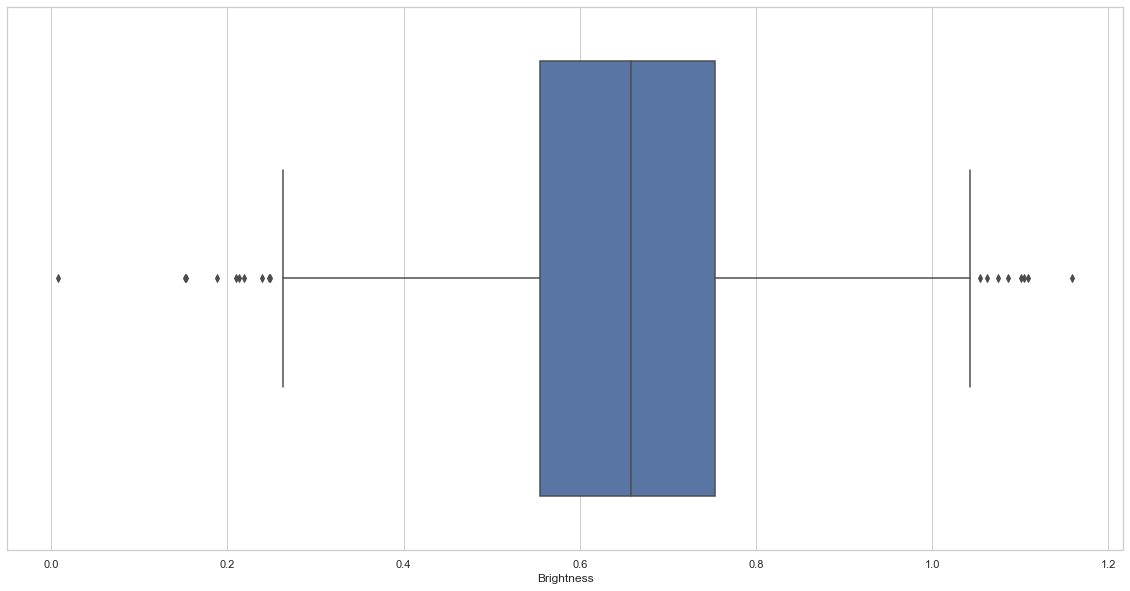

In [68]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6["Brightness"])

In [69]:
#numpy method of outlier removal

pulsar6npcleaned = pulsar6[(np.abs(stats.zscore(pulsar6["Brightness"])) <3)]
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty
0,1,0.634671,0.002761
1,2,0.736945,0.005207
2,3,0.693834,0.002706
3,4,1.021866,0.010184
4,5,0.673845,0.006236
...,...,...,...
693,694,0.776083,0.008928
694,695,0.625382,0.006018
695,696,0.647559,0.003765
696,697,0.312449,0.002901


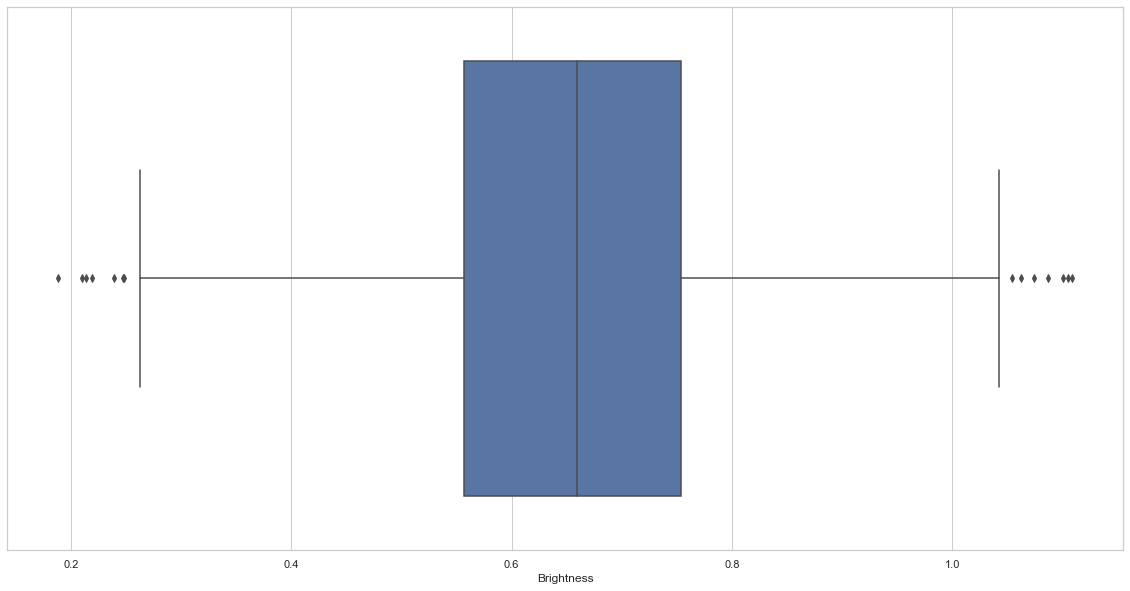

In [70]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6npcleaned["Brightness"])

In [71]:
pulsar6npcleaned["Brightness"].describe()

count    694.000000
mean       0.655970
std        0.159160
min        0.188069
25%        0.556461
50%        0.658903
75%        0.753396
max        1.109122
Name: Brightness, dtype: float64

In [72]:
pulsar6npcleaned["Brightness"].median()

0.6589028

In [73]:
median = pulsar6["Brightness"].median()
print("Median of Pulsar6: ", median)
pulsar6['Binary'] = np.where(pulsar6['Brightness'] > median, 1, 0)

Median of Pulsar6:  0.65829515


In [74]:
pulsar6

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.634671,0.002761,0
1,2,0.736945,0.005207,1
2,3,0.693834,0.002706,1
3,4,1.021866,0.010184,1
4,5,0.673845,0.006236,1
...,...,...,...,...
693,694,0.776083,0.008928,1
694,695,0.625382,0.006018,0
695,696,0.647559,0.003765,0
696,697,0.312449,0.002901,0


In [75]:
median = pulsar6npcleaned["Brightness"].median()
print("Median of Pulsar6 np cleaned: ", median)
pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)

Median of Pulsar6 np cleaned:  0.6589028


C:\Users\oxlay\AppData\Local\Temp/ipykernel_28036/1919336679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)


In [76]:
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.634671,0.002761,0
1,2,0.736945,0.005207,1
2,3,0.693834,0.002706,1
3,4,1.021866,0.010184,1
4,5,0.673845,0.006236,1
...,...,...,...,...
693,694,0.776083,0.008928,1
694,695,0.625382,0.006018,0
695,696,0.647559,0.003765,0
696,697,0.312449,0.002901,0


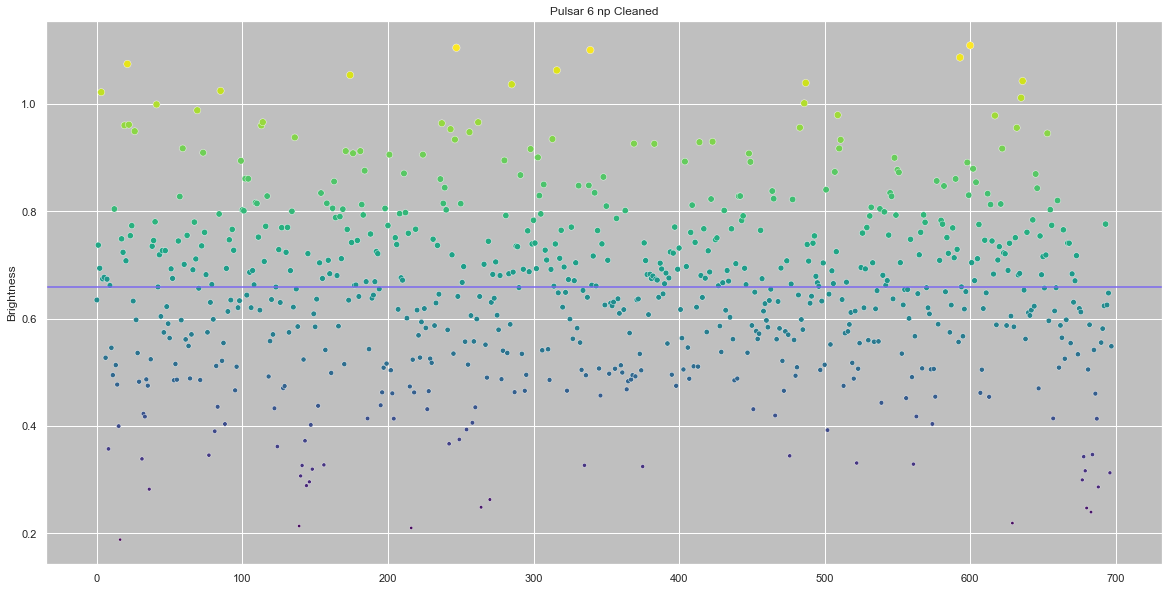

In [77]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.scatterplot(data=pulsar6npcleaned["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned')
ax = plt.axhline( y=0.6589028, ls='-',c='mediumslateblue')

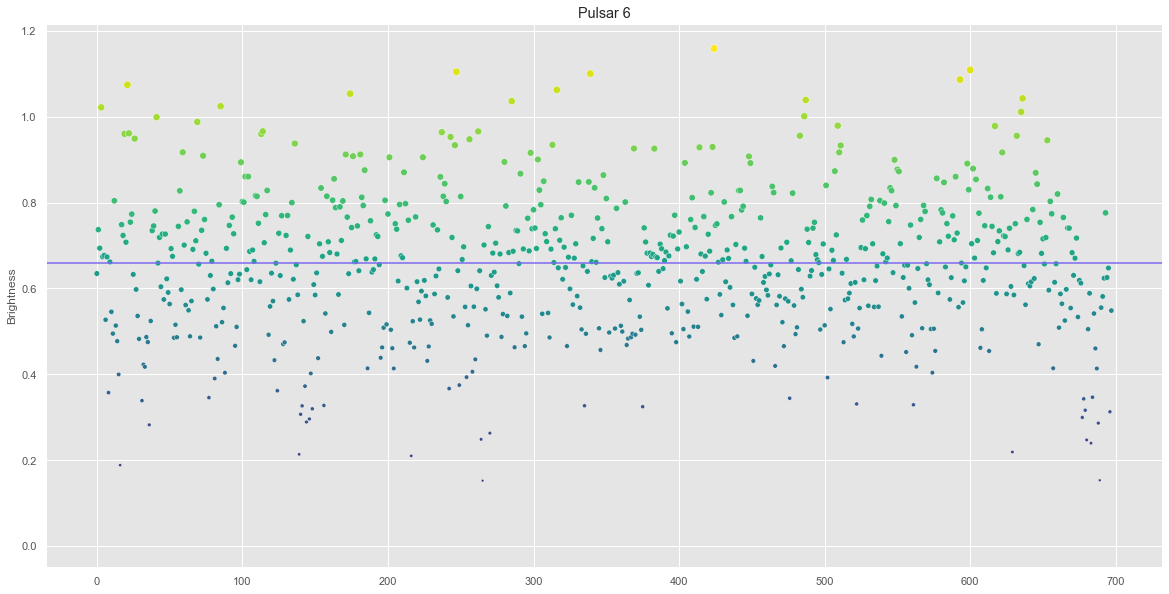

In [78]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6')
ax= plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')

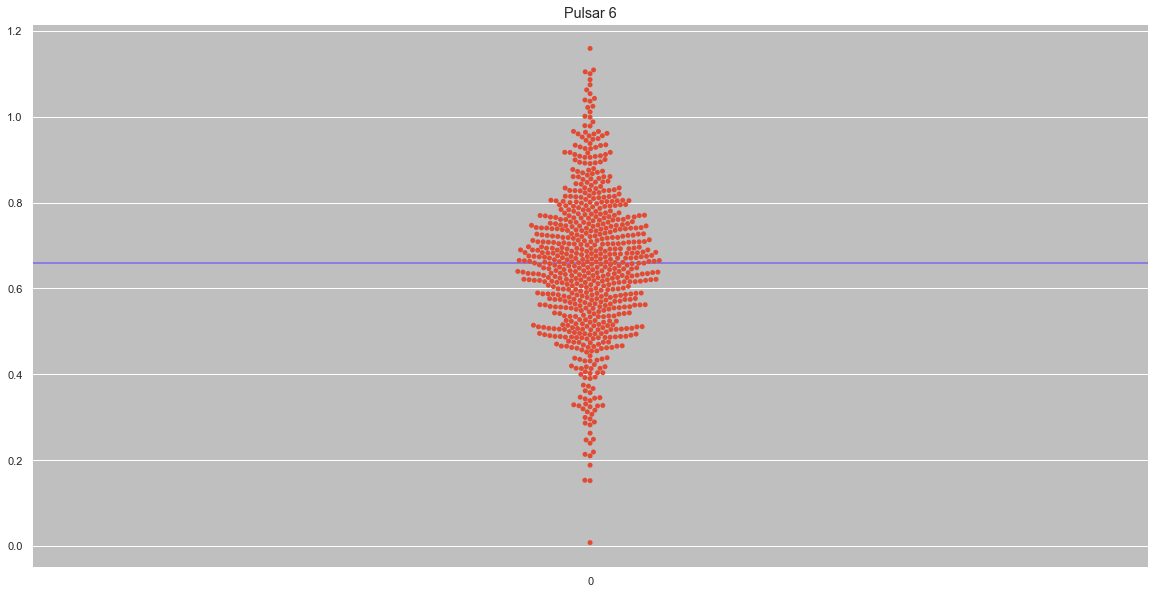

In [79]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=pulsar6["Brightness"], c="blue").set_title('Pulsar 6')


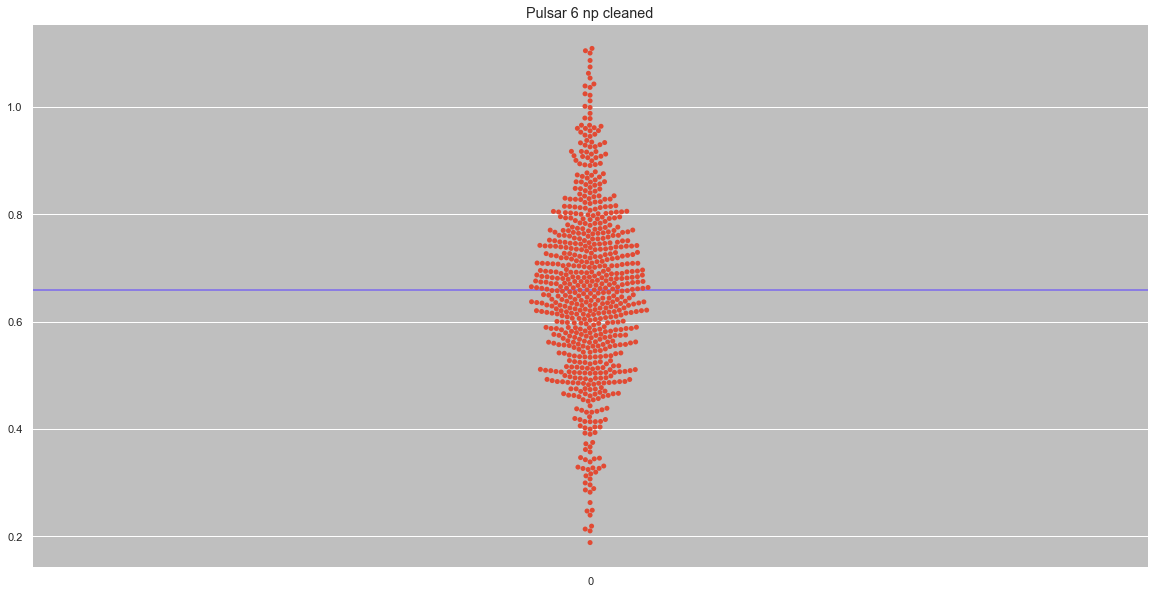

In [84]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.swarmplot(data=pulsar6npcleaned["Brightness"]).set_title('Pulsar 6 np cleaned')
ax = plt.axhline( y=0.6589028, ls='-', c='mediumslateblue')

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 Brightness')

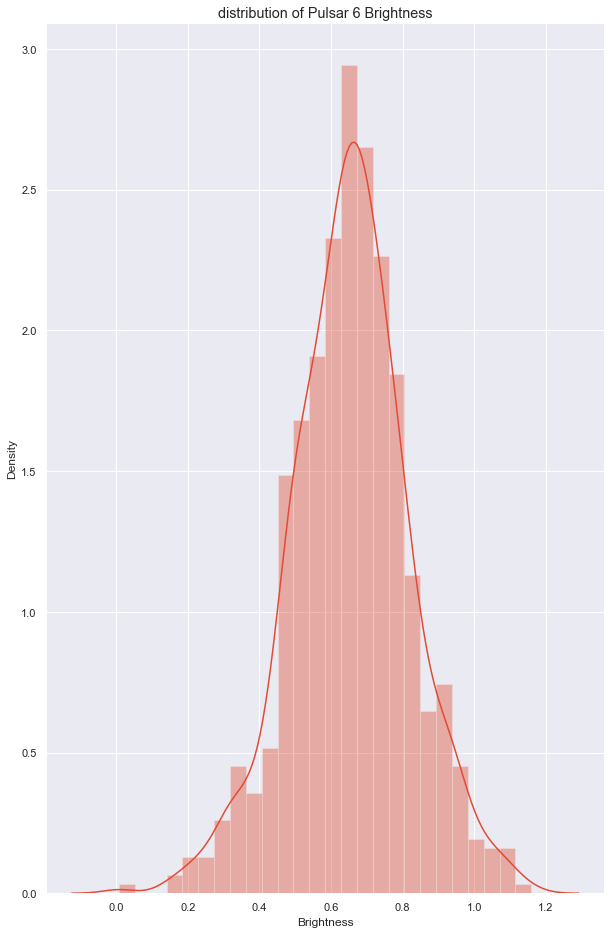

In [82]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Brightness)
plt.title("distribution of Pulsar 6 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned Brightness')

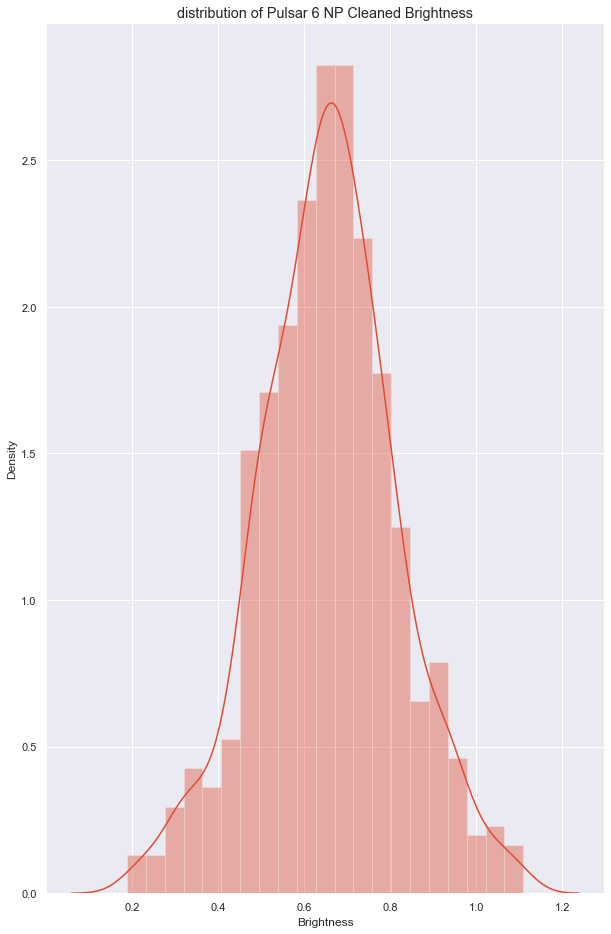

In [85]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Brightness)
plt.title("distribution of Pulsar 6 NP Cleaned Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned Brightness')

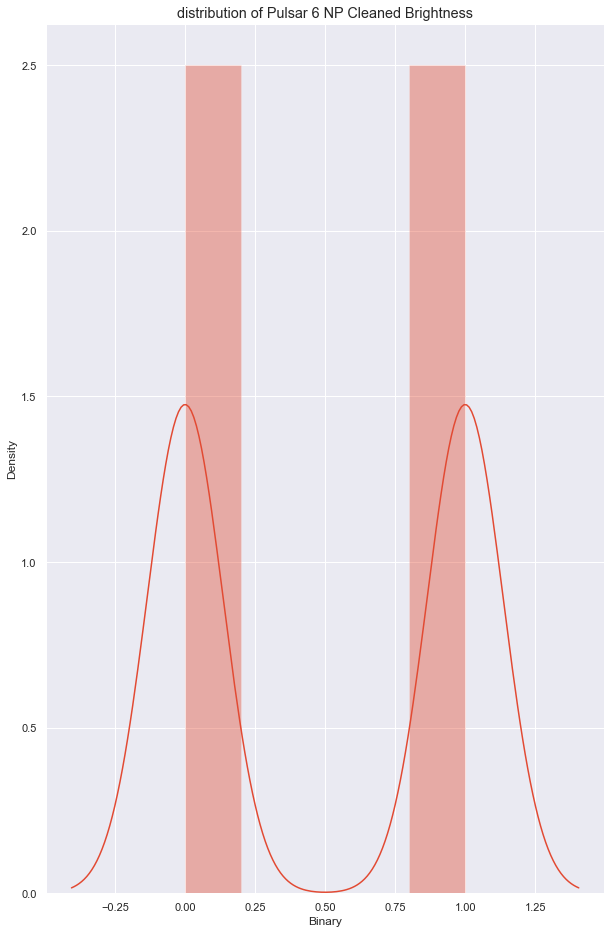

In [86]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Binary)
plt.title("distribution of Pulsar 6 NP Cleaned binary assignments")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 binary assignments')

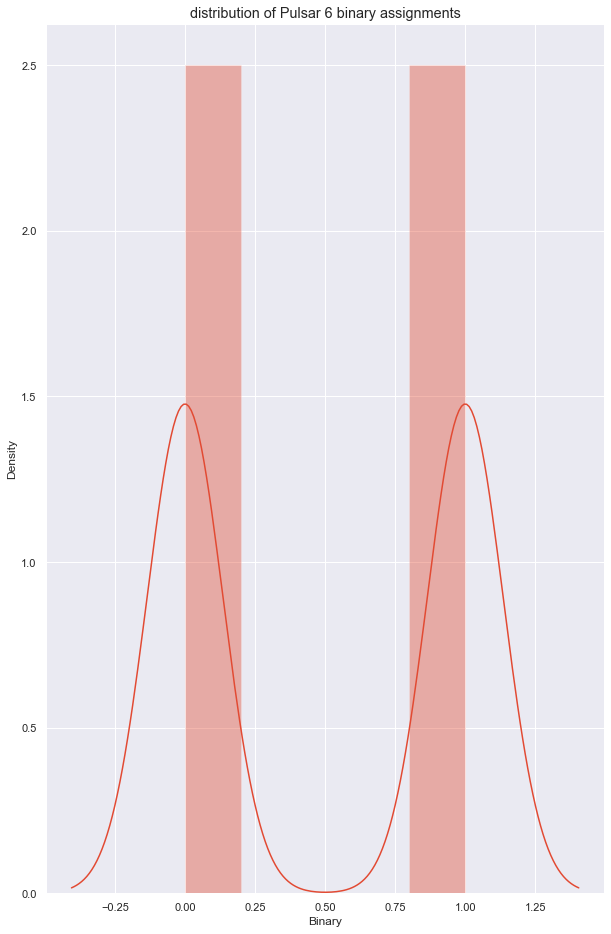

In [87]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Binary)
plt.title("distribution of Pulsar 6 binary assignments")